Работа с pandas

Импорт нужных для работы библиотек numpy, pandas и matplotlib

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаю учебный датасет с помощью pd.read_csv в формате csv и вывожу его содержание

In [81]:
file = 'S02-hw-dataset.csv'
data = pd.read_csv(file, sep = ',')
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


С помощью метода head() вывожу первые 4 строки датасета (если использовать данный метод без параметров, то будут выведены 5 первых строк)

In [82]:
data.head(4)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654


С помощью метода info() вывожу информацию о столбцах и типах

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


С помощью метода describe() вывожу базовые описательные статистики

In [84]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


С помощью метода isna().mean() посчитаю долю пропусков в каждом столбце

In [85]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

С помощью метода duplicated() проверяю наличие полностью дублирующих строк

In [86]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

В данном примере организована проверка на отрицательные значения количества покупок и выручки с помощью условий mask_neg

In [87]:
mask_neg = (data['purchases'] < 0) | (data['revenue'] < 0)
suspicious_data_neg = data[mask_neg]
suspicious_data_neg

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


В данном примере организована проверка на слишком низкий и слишком высокий возраст с помощью условий mask_age

In [88]:
mask_age = (data['age'] < 14) | (data['age'] > 101)
suspicious_data_age = data[mask_age]
suspicious_data_age

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


В данном примере организована проверка на противоречия, если есть покупки но нет выручки с помощью условий mask_inc

In [89]:
mask_inc = (data['purchases'] > 0) & (data['revenue'] == 0)
suspicious_data_inc = data[mask_inc]
suspicious_data_inc

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


Частота для переменной country
Здесь показано количество покупателей из определенной страны

In [90]:
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Осмысленная группировка с агрегатами
Агрегация и вывод информации о средних покупках и среднем доходе по странам

In [91]:
country_group = data.groupby('country')
agg_group = country_group[['purchases', 'revenue']].agg(['mean', 'sum'])
agg_group.round(2)

purchases      revenue       
             mean sum     mean    sum
country                              
CN           4.50   9  1054.00   2108
DE           6.50  39  1445.50   8673
FR           4.25  51   675.92   8111
RU           4.77  62   790.08  10271
US           4.62  37   557.38   4459

Из всех анализов данных можно узнать, что по численности пользователей доминирует Россия (13 пользователей), далее идет Франция (12 пользователей), далее США (8 пользователей), далее Германия (6 пользователей) и в конце Китай (2 пользователя).

Также можно сказать, что у Германии самая большая средняя выручка на пользователя (как можно увидеть из таблицы она составляет 1445.50), то есть имеет самую высокую ценность. При этом в Китае средняя выручка всего с двух пользователей достаточно большая (1054.00). В США самая низкая средняя выручка (557.38)

Визуализация данных в Matplotlib

На этой гистограмме показано распределение выручки. Большинство покупателей приносят до 1000 единиц выручки, но есть и часть с высокой выручкой.
Также в коде присутствует осмысленный выбор числа корзин bins, на такое количество корзин будет делиться диапазон значений количественого признака

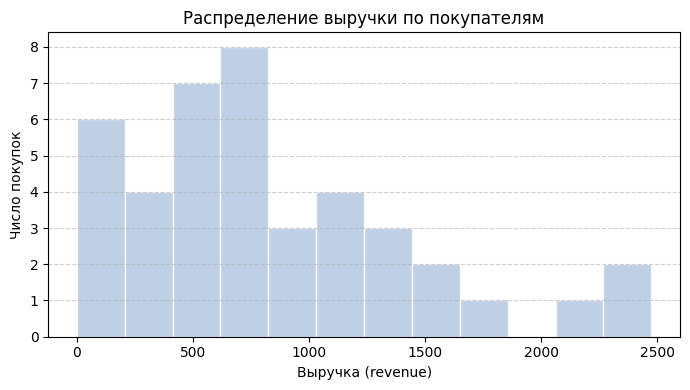

In [92]:
fig, ax = plt.subplots(figsize = (7, 4))
ax.hist(data['revenue'], bins = 12, color = 'lightsteelblue', edgecolor = 'white', alpha = 0.8)
ax.set_title('Распределение выручки по покупателям')
ax.set_xlabel('Выручка (revenue)')
ax.set_ylabel('Число покупок')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.6)
fig.tight_layout()

fig.savefig('figures/hist_revenue_purchases', dpi = 300)
plt.show()

На боксплоте по странам можно заметить, что Германия выделяется высокой медианной выручкой и отсутствием низких значений
В США и Франции много пользователей с низкой выручкой
Россия показывает наибольший разброс - от 0 до чуть больше 2000 (2086)

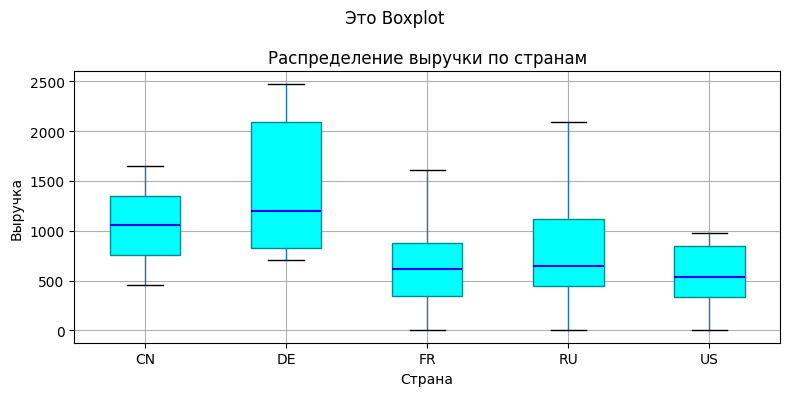

In [93]:
fig, ax = plt.subplots(figsize = (8, 4))
data.boxplot(column = 'revenue', by = 'country', ax = ax, patch_artist = True,
             boxprops = dict(facecolor = 'cyan', color = 'darkcyan'),
             medianprops = dict(color = 'blue', linewidth = 1.5))

ax.set_title('Распределение выручки по странам')
ax.set_xlabel('Страна')
ax.set_ylabel('Выручка')
plt.suptitle('Это Boxplot') # это для того, чтобы заменить автоматический заголовок pandas
fig.tight_layout()

fig.savefig('figures/boxplot_revenue_countries', dpi = 300)
plt.show()

На scatter plot показана связь между числом покупок и общей выручкой по покупателям, при этом точки на графике различаются цветом по странам для наглядности.
Тут видно, что при одинаковом числе покупок выручка может силно различаться. Например, покупатели из Германии при покупках приносят выручки в большинстве случаев больше, чем покупатели из других стран при том же количестве покупок. Это может указывать на более высокую среднюю сумму на одну покупку в Германии

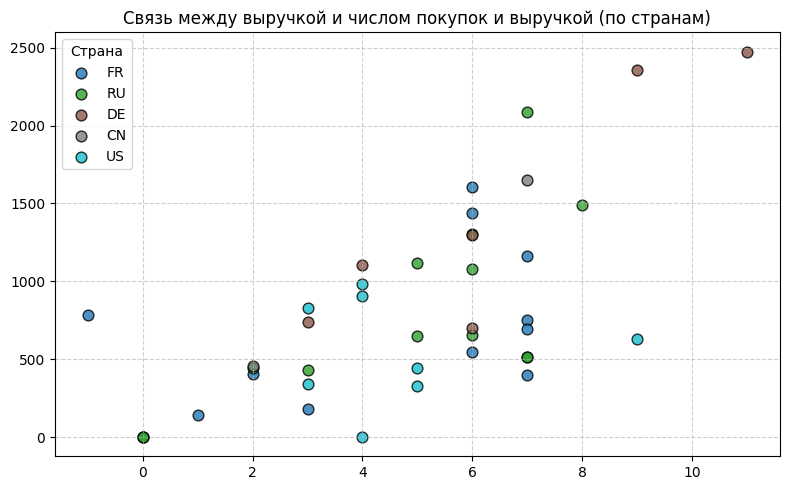

In [94]:
fig, ax = plt.subplots(figsize = (8, 5))

countries = data['country'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(countries)))

for country, color in zip(countries, colors):
    subset = data[data['country'] == country]
    ax.scatter(
    x = subset['purchases'],
    y = subset['revenue'],
    label = country,
    color = color,
    edgecolor = 'k',
    s = 60,
    alpha = 0.8
    )

ax.set_title('Связь между выручкой и числом покупок и выручкой (по странам)')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Страна', loc = 'upper left')
ax.grid(True, linestyle = '--', alpha = 0.6)
fig.tight_layout()

fig.savefig('figures/scatter_revenue_purchases', dpi = 300)
plt.show()